In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Load Dataset

In [119]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [40]:
df.shape

(30, 17)

# Checking for null value

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

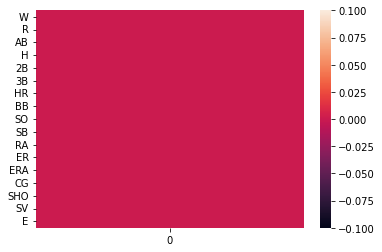

In [10]:
sns.heatmap(df.isnull().sum().to_frame())

In [11]:
# not-null value for all columns.

# Basic information about dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Visualization

In [34]:
# visualize the distribution of continuous features

In [60]:
# For R

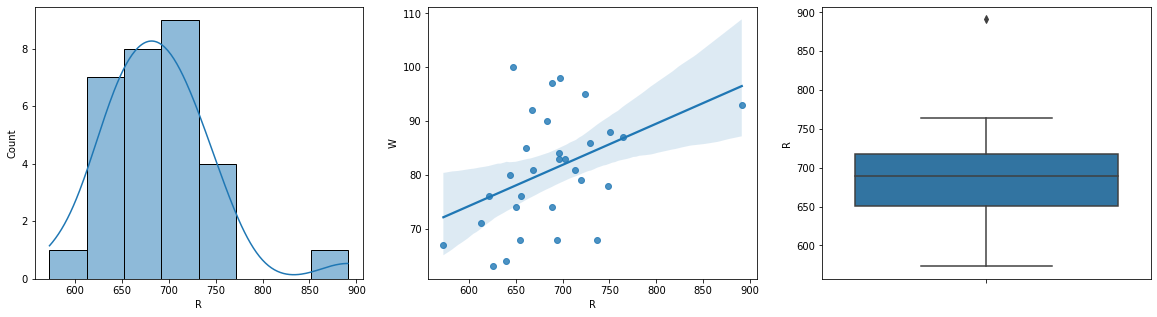

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='R',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='R',data=df)    
plt.show()

In [79]:
# Run and win are linearly correlated. And outliers are present between 850 and 900

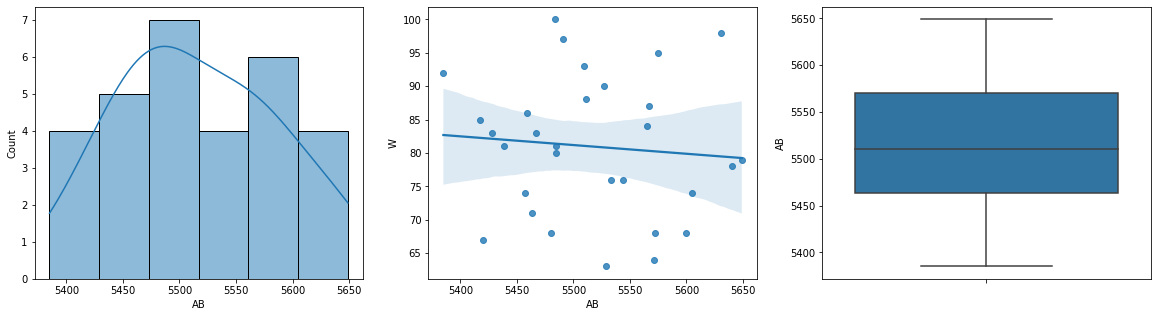

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='AB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='AB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='AB',data=df)    
plt.show()

In [80]:
# At balls is very weekly related to Wins With no outliers

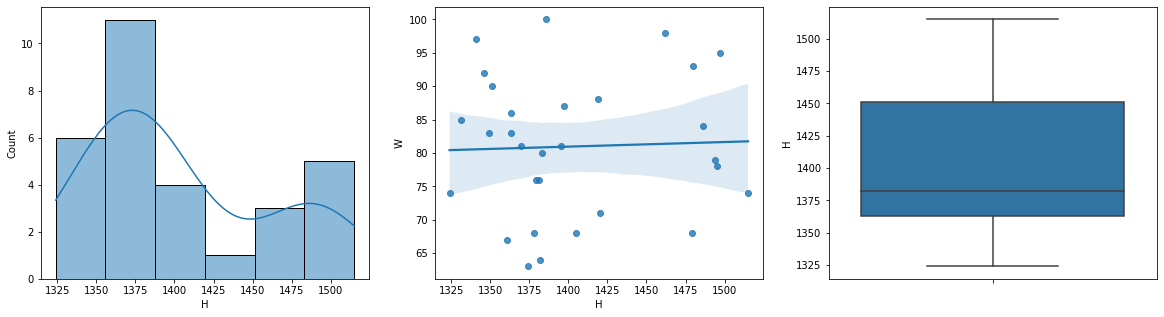

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='H',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='H',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='H',data=df)    
plt.show()

In [81]:
# Hits are also very weekly related to winning with no outliers

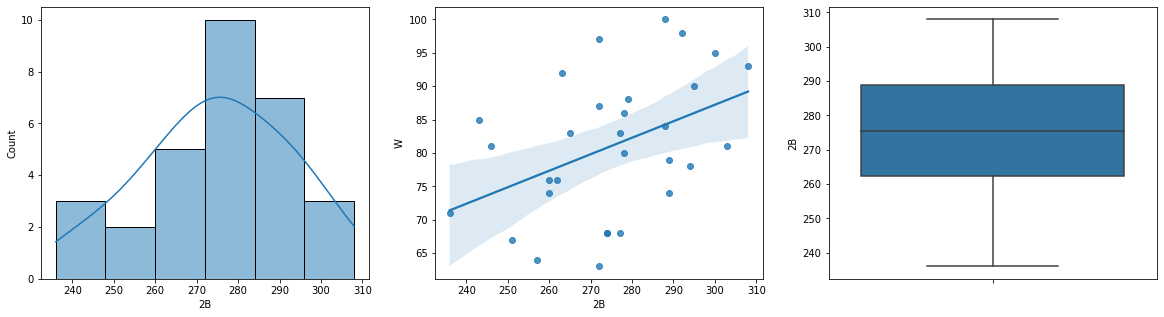

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='2B',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='2B',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='2B',data=df)    
plt.show()

In [82]:
# Doubles are linearly related with Wins, with no outlier, and data is left-skewed

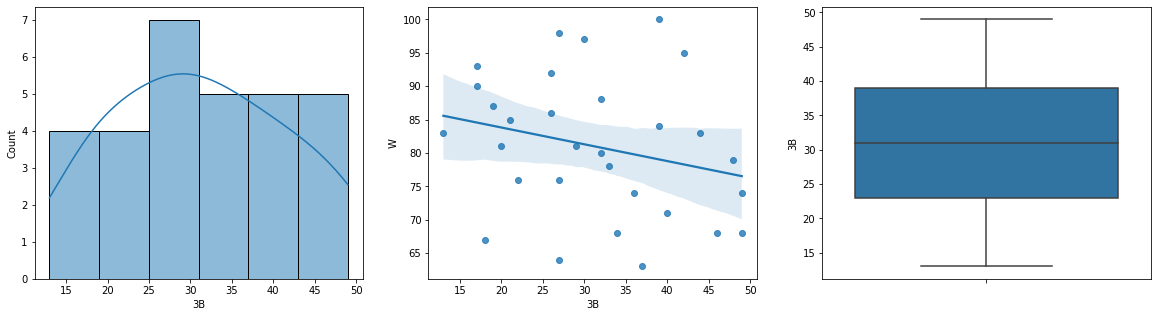

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='3B',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='3B',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='3B',data=df)    
plt.show()

In [85]:
# Triple has very weak negative correlations with win with no outlier and data is right-skewed

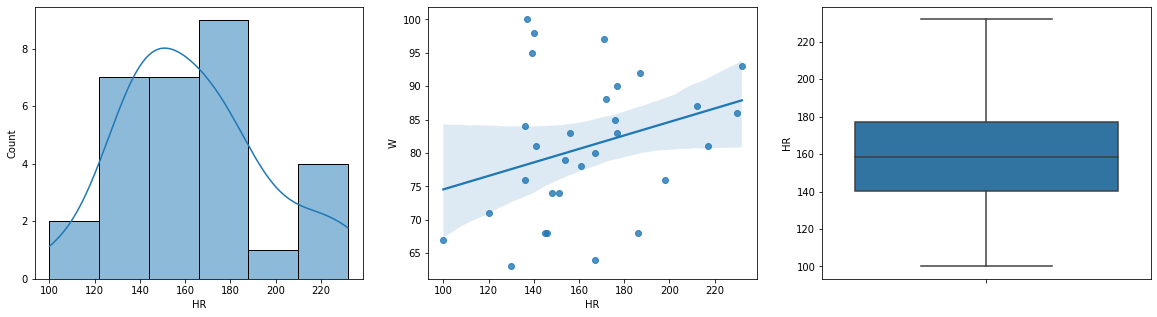

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='HR',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='HR',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='HR',data=df)    
plt.show()

In [86]:
# The home run has a very low correlation with wins with no lot of outliers and data is right-skewed

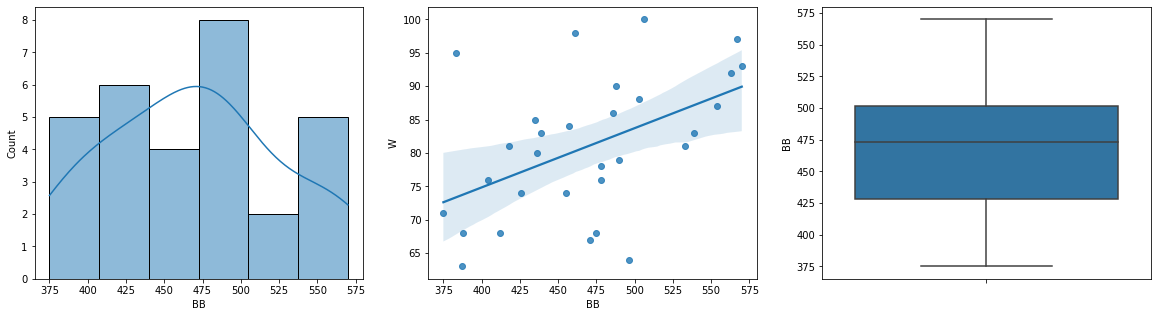

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='BB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='BB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='BB',data=df)    
plt.show()

In [87]:
# Walk is lightly correlated to win with no outlier

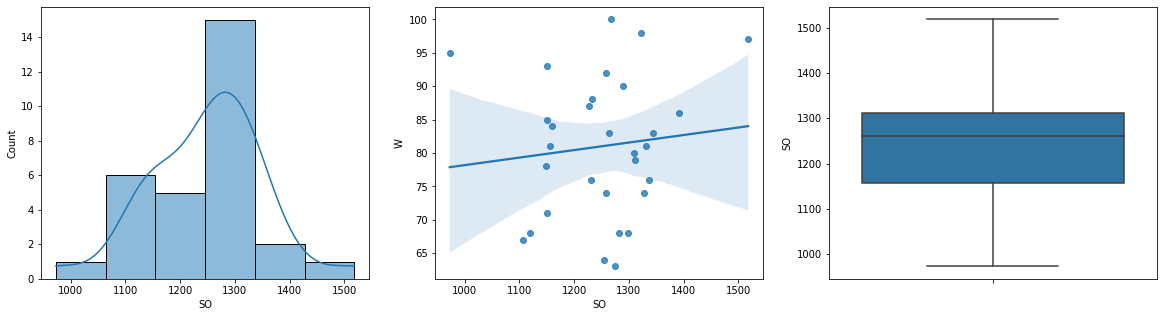

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='SO',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SO',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SO',data=df)    
plt.show()

In [89]:
# Strikeout is not correlated to win with no outlier and the dataset is left-skewed

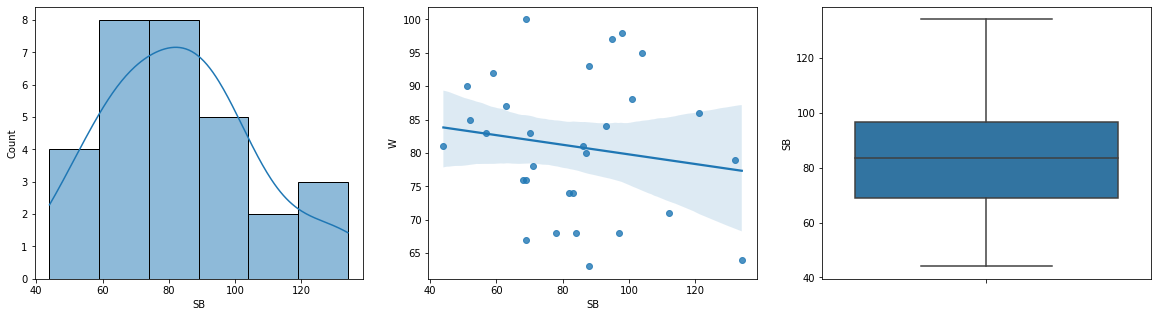

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='SB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SB',data=df)    
plt.show()

In [90]:
# Stolen Bases is not correlated to win with no outlier

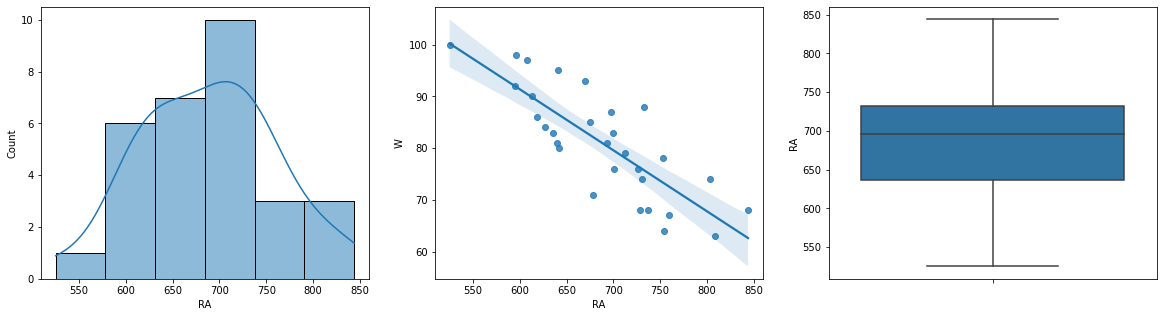

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='RA',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='RA',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='RA',data=df)    
plt.show()

In [91]:
# Runs Allowed is highly correlated to win with no outliers

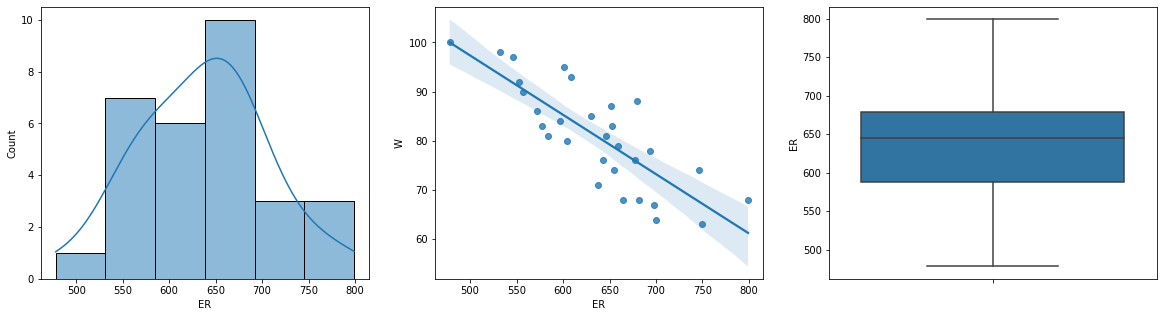

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='ER',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='ER',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='ER',data=df)    
plt.show()

In [92]:
# Earned Runs is highly correlated to win with no outliers

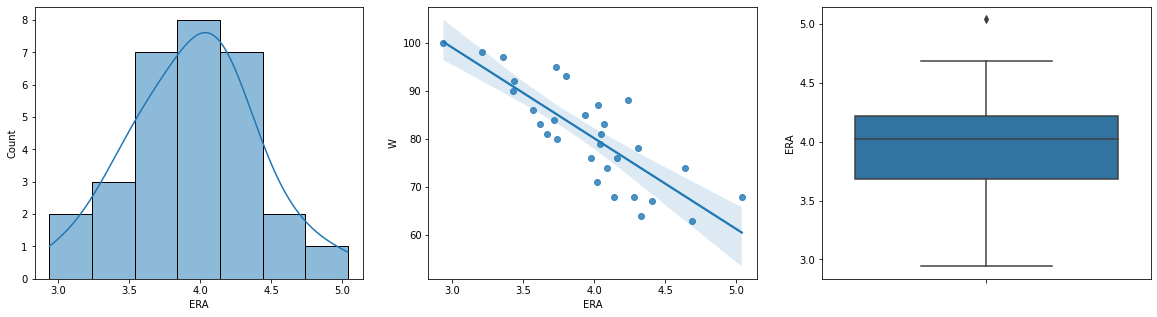

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='ERA',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='ERA',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='ERA',data=df)    
plt.show()

In [93]:
# Earned Run Average (ERA) is not correlated to win with no outliers and data is right-skewed.

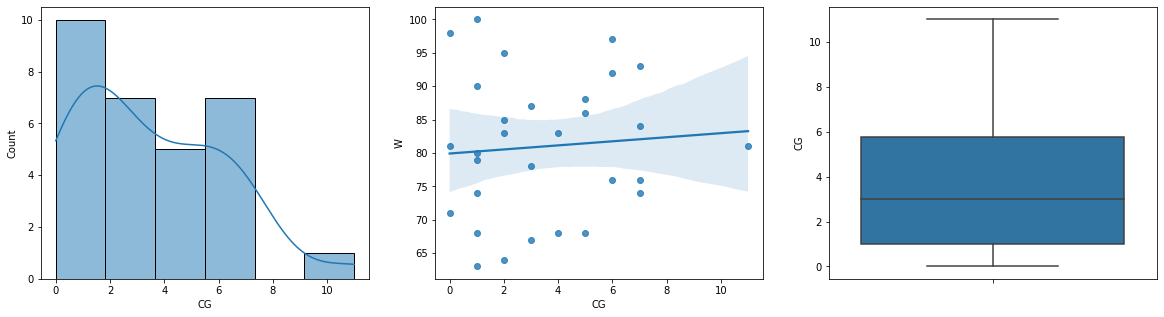

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='CG',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='CG',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='CG',data=df)    
plt.show()

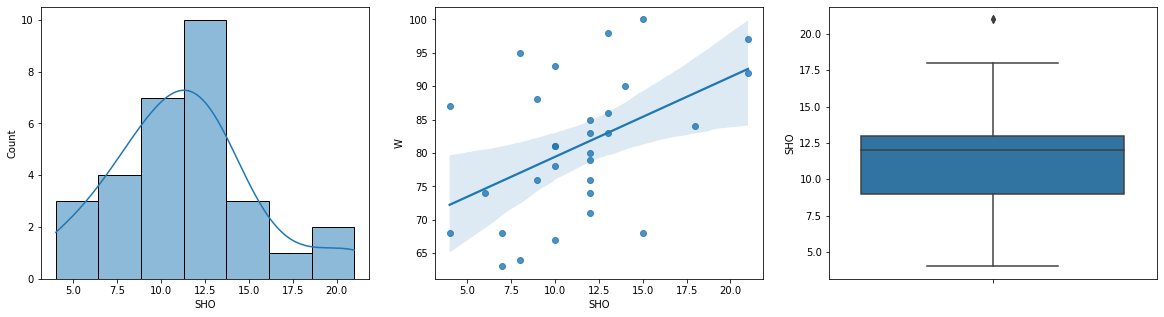

In [76]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='SHO',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SHO',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SHO',data=df)    
plt.show()

In [97]:
# Shutouts are highly correlated to win with no outliers and data is right-skewed.

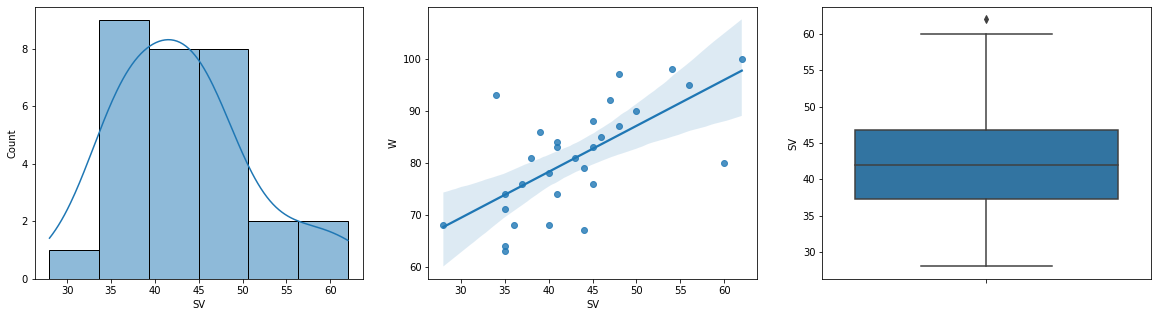

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='SV',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SV',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SV',data=df)    
plt.show()

In [95]:
#Saves are lightly correlated to win with no outliers-skewed

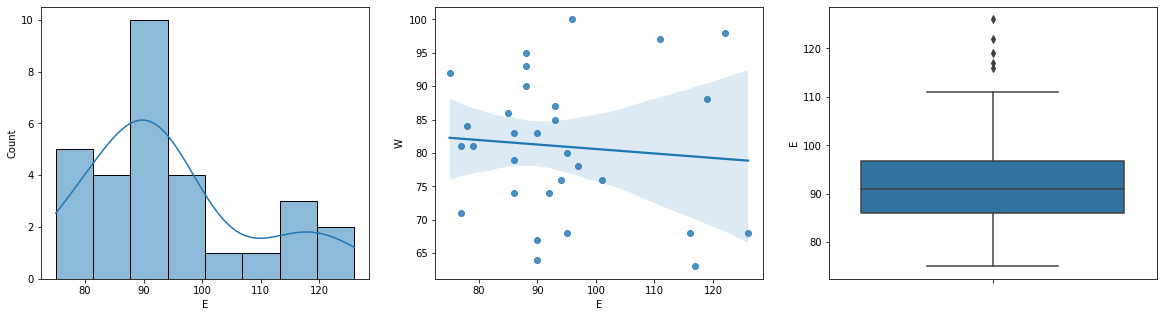

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)    
sns.histplot(x='E',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='E',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='E',data=df)    
plt.show()

In [96]:
# Errors are not correlated to win, the data has outliers and data is right-skewed.

In [98]:
# The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated

In [99]:
# Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

In [100]:
# The remaining features have less to no linear correlation with no of Wins

# Z-Score

In [118]:
import scipy.stats as stat
z=np.abs(stat.zscore(df_z))
z
a=int(df_z.size)
df_z = df_z[(z>3).all(axis=1)]


NameError: name 'df_z' is not defined

In [120]:
Q1,Q3 = np.percentile(df,[25,75])

In [122]:
IQR = Q3-Q1

In [126]:
Upper_IQR = Q3 + (1.5 * IQR)

Lower_IQR = Q1 - (1.5 * IQR)

In [ ]:
Q1 = np.percentile(df_boston[‘DIS’], 25,
interpolation = ‘midpoint’)